# 1. MLPClassifier for Classification Task

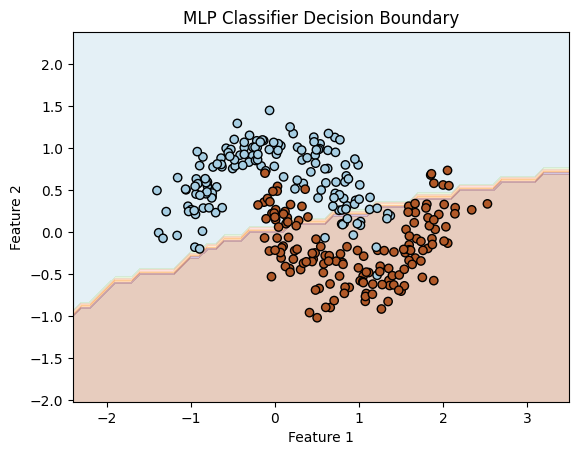

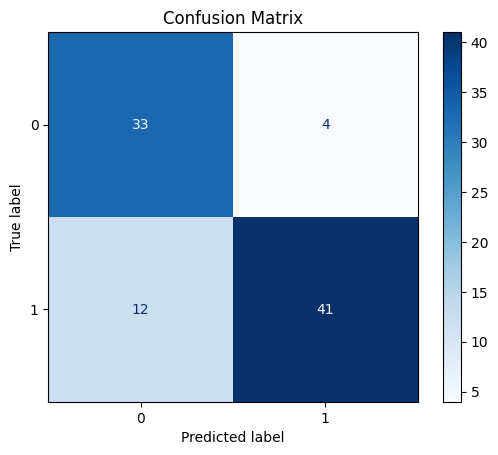

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Generate dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=0)
mlp_clf.fit(X_train, y_train)

# Visualization: Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("MLP Classifier Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, mlp_clf)

# Visualization: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# 2. MLPRegressor for Regression Task

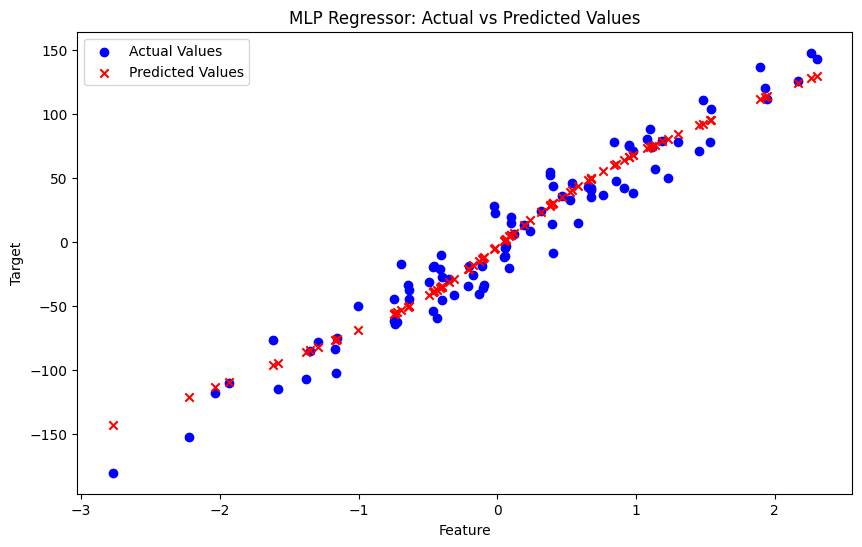

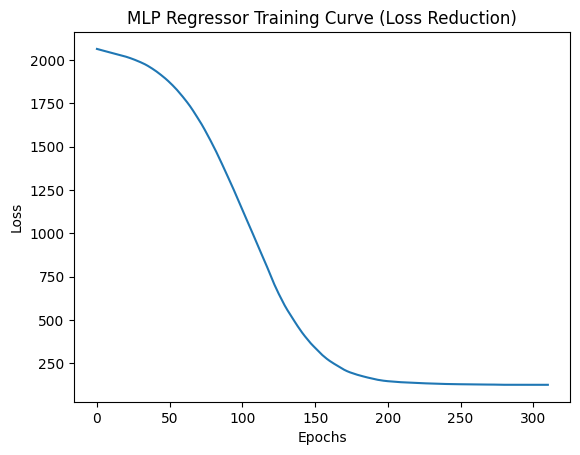

Mean Squared Error: 283.672812179554
R^2 Score: 0.9390023780952174


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a simple regression dataset
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=0)
mlp_reg.fit(X_train, y_train)

# Predictions
y_pred = mlp_reg.predict(X_test)

# Visualization: True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Values')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("MLP Regressor: Actual vs Predicted Values")
plt.legend()
plt.show()

# Plotting Training Curve to show Loss Reduction over Epochs
plt.plot(mlp_reg.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Regressor Training Curve (Loss Reduction)")
plt.show()

# Model Performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
